In [26]:
import tensorflow as tf
import keras
from tensorflow.keras import datasets, layers, models
from keras.layers import LeakyReLU
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from keras.datasets import mnist
from sklearn.datasets import load_iris
from numpy import reshape
import seaborn as sns
import pandas as pd 

In [2]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [3]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [28]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='ReLU', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='ReLU'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='ReLU'))

model.add(layers.Flatten(name="flattenlayer"))
model.add(layers.Dense(64, activation='ReLU'))
model.add(layers.Dense(10))

In [29]:
lr = 1e-6
n_epochs = 1

optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=n_epochs, 
                    validation_data=(test_images, test_labels))

1875/1875 [==============================] - 35s 19ms/step - loss: 2.2799 - accuracy: 0.2076 - val_loss: 2.2549 - val_accuracy: 0.3070


In [30]:
extractor = keras.Model(inputs=model.inputs,
                        outputs=model.get_layer(name="flattenlayer").output)

features = extractor.predict(train_images)

C:\Users\fanta\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\fanta\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[Text(0.5, 1.0, 'MNIST data T-SNE projection')]

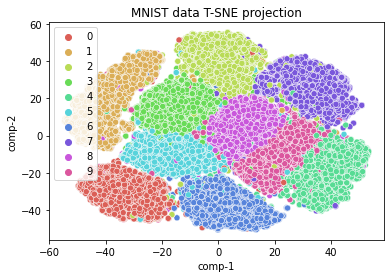

In [31]:
#x_mnist = reshape(train_images, [train_images.shape[0], train_images.shape[1]*train_images.shape[2]])

tsne = TSNE(n_components=2,random_state=123)
z = tsne.fit_transform(features)
df = pd.DataFrame()
df["y"] = train_labels
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 10),
                data=df).set(title="MNIST data T-SNE projection") 